# About Dataset

The village market has a section dedicated to fish - and there are a variety of fish available there. 
This dataset contains the details of fish that is brought into the market. The fish is valued for its 
weight and size. We find parameters like the weight, the width, the height and lengths of the fish in the dataset.

### Reading the data

In [41]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the data
data = pd.read_csv("Fish.csv")

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# displaying the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
data.Species.nunique()

7

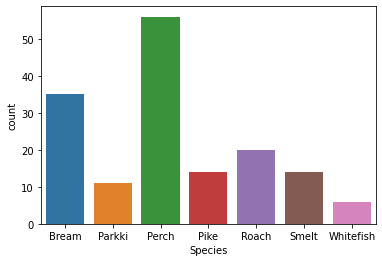

In [40]:
sns.countplot(data.Species)
plt.show()

In [6]:
#converting the object variable to categorical
cat_attr=data.select_dtypes(include="O").columns
data[cat_attr]=data[cat_attr].astype('category')

### EDA

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


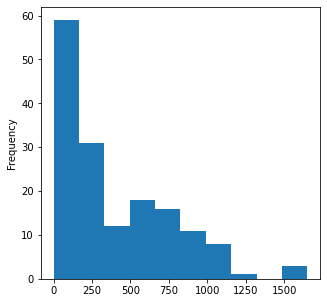

In [8]:
# sns.distplot(a=data.Weight)
# plt.show()
# data.hist()
data.Weight.plot(kind='hist',subplots=True,sharex=False,sharey=False,figsize=(5,5))
plt.show()

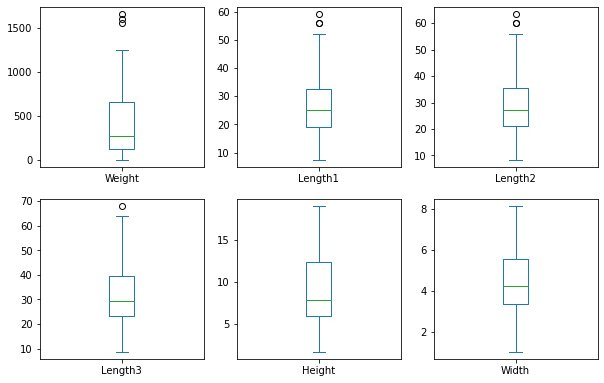

In [9]:
data.plot(kind='box',subplots=True
         )
plt.show()

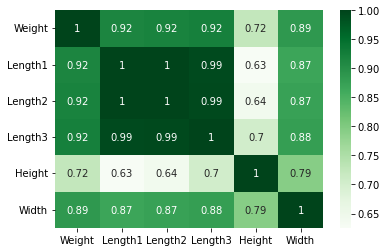

In [10]:
#corelation heatmap
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Greens')
plt.show()

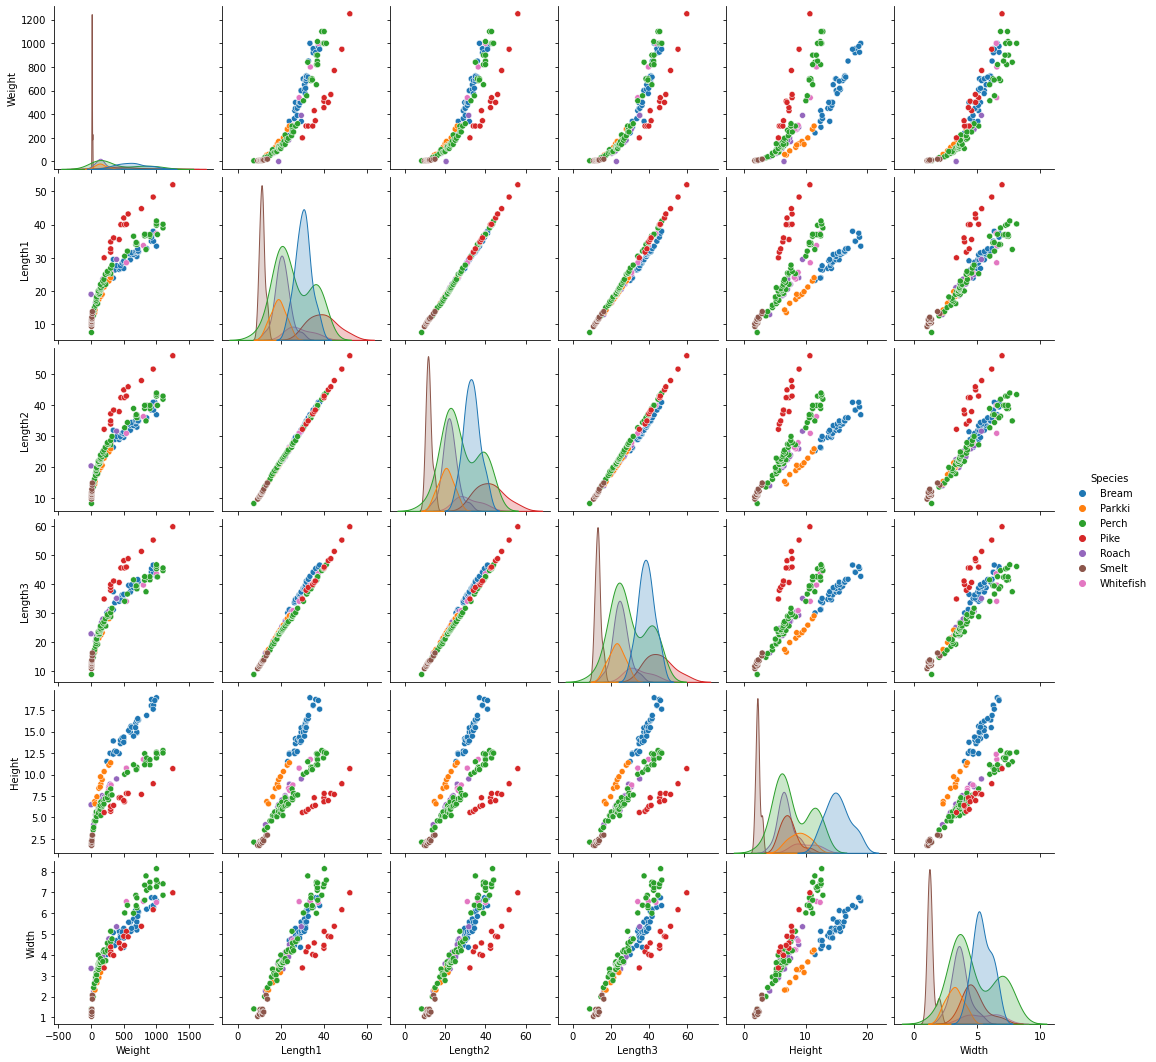

In [38]:
sns.pairplot(data,hue='Species')
plt.show()

In [12]:
# Removing the outliers

Q1=np.quantile(data['Weight'],0.25)
Q3=np.quantile(data['Weight'],0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

print('Original shape',data.shape)

data=data.loc[(data['Weight']>lower) & (data['Weight']<upper),]

print('New shape',data.shape)

Original shape (159, 7)
New shape (156, 7)


In [13]:
# sns.boxplot(data.Weight)
# plt.show()

In [14]:
# checking for the missing values
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [15]:
data_dummy=pd.get_dummies(data,drop_first=True)
# data.tail()

In [16]:
X=data_dummy.drop('Weight',axis=1)
y=data_dummy['Weight']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11234)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 11)
(32, 11)
(124,)
(32,)


In [19]:
import statsmodels.api as sm
X_reg=sm.add_constant(X_train)
X_test_reg=sm.add_constant(X_test)

C:\Users\RAJESH\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
model=sm.OLS(y_train,X_reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     186.7
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           1.26e-66
Time:                        09:23:40   Log-Likelihood:                -704.87
No. Observations:                 124   AIC:                             1434.
Df Residuals:                     112   BIC:                             1468.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -764.1553    115.58

In [21]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')

In [22]:
#visualizing the Assumption plots of the model
def get_plots(y_train,preditctions):
    f = plt.figure(figsize=(20,10))
    ax = f.add_subplot(221)
    sns.scatterplot(y_train,preditctions,ax=ax,color='r')
    ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
    
    std_residuals = stats.zscore(y_train-preditctions)
    ax = f.add_subplot(222)
    sns.scatterplot(preditctions,std_residuals,ax=ax,color='g')
    ax.set_title('Check for Linearity:\n Predicted value Vs Std.Residuals')


# Check for Residual normality & mean
    ax = f.add_subplot(223)
    sns.distplot((y_train - preditctions),ax=ax,color='b')
    ax.axvline((y_train - preditctions).mean(),color='k',linestyle='--')
    ax.set_title('Check for Residual normality & mean: \n Residual eror');

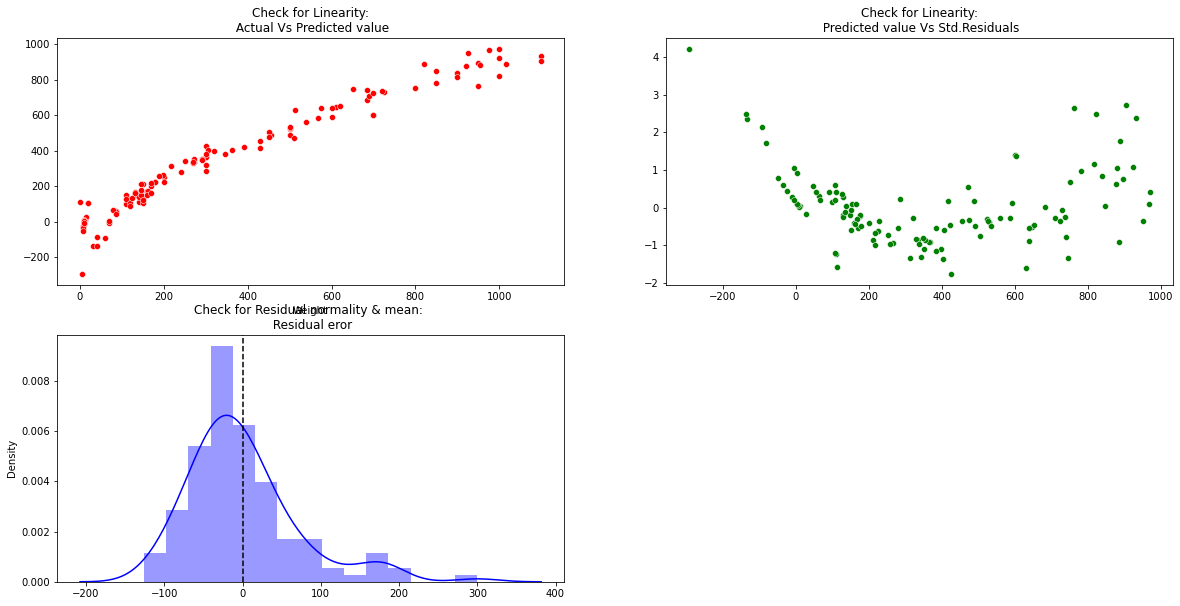

In [23]:
get_plots(y_train,model.fittedvalues)

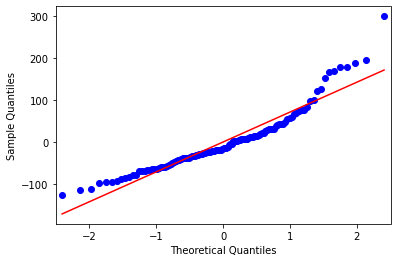

In [24]:
# Residuals - QQ Plot
# ax = f.add_subplot(224)
sm.qqplot(model.resid, line='s')

plt.show()

In [25]:
from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test'])

def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAPE_Train = metrics.mean_absolute_percentage_error(train_act,train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    MAPE_Test = metrics.mean_absolute_percentage_error(test_act,test_pred)
    dataframe = dataframe.append(pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [26]:
scores = get_metrics(y_train,model.predict(X_reg),y_test,model.predict(X_test_reg),"simple_reg",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test
0,simple_reg,52.251297,5069.855816,71.20292,4.112301e+15,69.017871,8692.051139,93.23117,0.359163


## Model with only significant variables

In [27]:
# We can see from the corelation plot that lengths are highly correlated among themselves
# therefore dropping the length colmn and analysing the prerformance of the model
data_sigvar=data.drop(['Length2','Length3'],axis=1)

<AxesSubplot:>

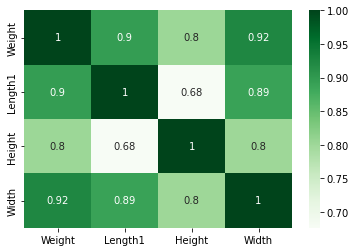

In [28]:
sns.heatmap(data_sigvar.corr(),cmap='Greens',annot=True)

In [29]:
# data_sigvar.info()

In [30]:
data_sigvar=pd.get_dummies(data_sigvar,drop_first=True)
data_sigvar.head()

,Weight,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,12.4440,5.1340,0,0,0,0,0,0


In [31]:
X1=data_sigvar.drop('Weight',axis=1)
y1=data_sigvar['Weight']

In [32]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=11234)

In [33]:
X1_reg=sm.add_constant(X1_train)
X1_test_reg=sm.add_constant(X1_test)

In [34]:
model1=sm.OLS(y1_train,X1_reg).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     231.7
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           6.21e-69
Time:                        09:23:41   Log-Likelihood:                -705.03
No. Observations:                 124   AIC:                             1430.
Df Residuals:                     114   BIC:                             1458.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -809.7418     74.90

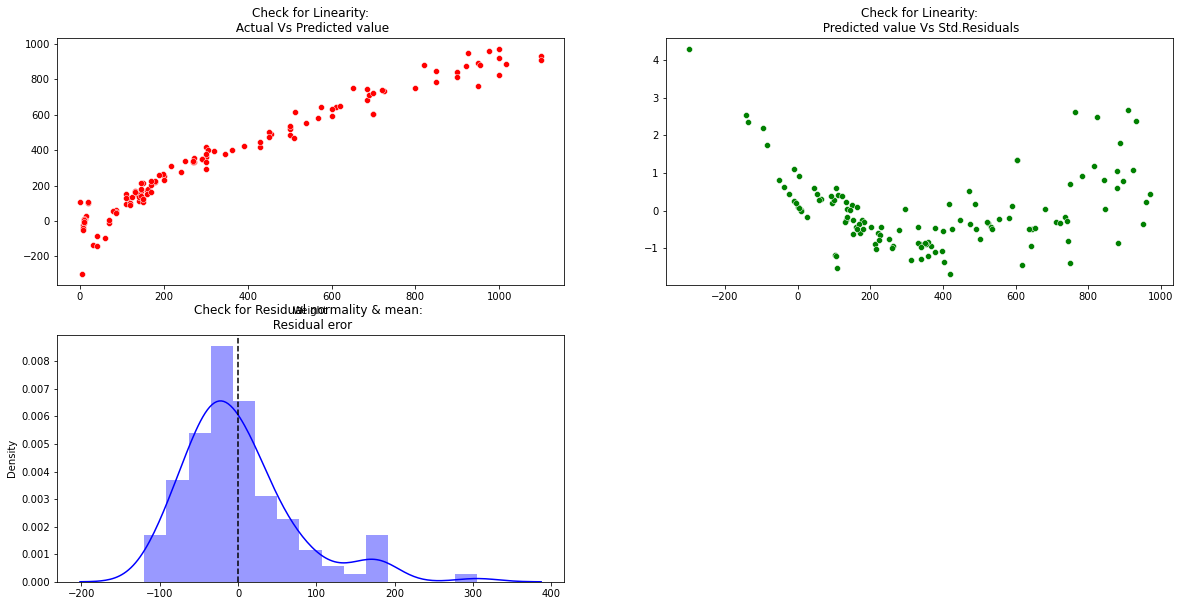

In [35]:
get_plots(y1_train,model1.fittedvalues)

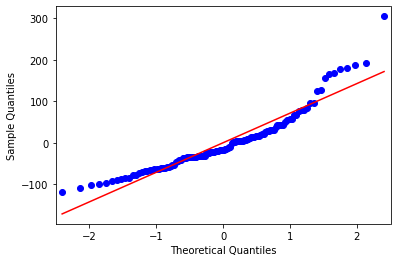

In [36]:
sm.qqplot(model1.resid, line='s')

plt.show()

In [37]:
scores = get_metrics(y1_train,model1.predict(X1_reg),y1_test,model1.predict(X1_test_reg),"Model_sigvar",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test
0,simple_reg,52.251297,5069.855816,71.20292,4.112301e+15,69.017871,8692.051139,93.231170,0.359163
1,Model_sigvar,52.625702,5082.251212,71.28991,3.942197e+15,69.416228,8685.183668,93.194333,0.358955
